In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [50]:
# Other Libraries

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


In [51]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


In [52]:
creditcard = pd.read_csv('creditcard.csv')

creditcard.head(500)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,365.0,-1.209437,0.949446,-0.429811,-2.640094,2.601387,3.056966,0.473495,0.280729,0.853043,...,-0.214920,-0.449815,-0.088677,1.030439,-0.048967,0.671979,-0.612153,-0.224000,0.68,0
496,366.0,-1.185698,-0.386510,1.623072,1.636406,1.102506,-0.683317,-0.303337,0.285653,-0.056085,...,0.068753,-0.006952,0.040889,0.040937,0.009224,-0.201042,0.106580,0.140465,9.99,0
497,366.0,1.020399,-0.639479,0.941568,0.121307,-0.996320,0.177803,-0.589656,0.153583,0.835979,...,-0.140624,-0.341663,-0.060548,0.116672,0.144624,0.932850,-0.049522,0.018131,97.47,0
498,367.0,1.256217,0.255028,0.277716,0.706677,-0.495831,-1.106735,-0.008493,-0.124504,0.243687,...,-0.303927,-0.943830,0.146551,0.307164,0.169070,0.099129,-0.032095,0.027743,1.29,0


Firstly, we get the Data Info!

In [53]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Now! We find if there are any missing values in the dataset

<AxesSubplot: >

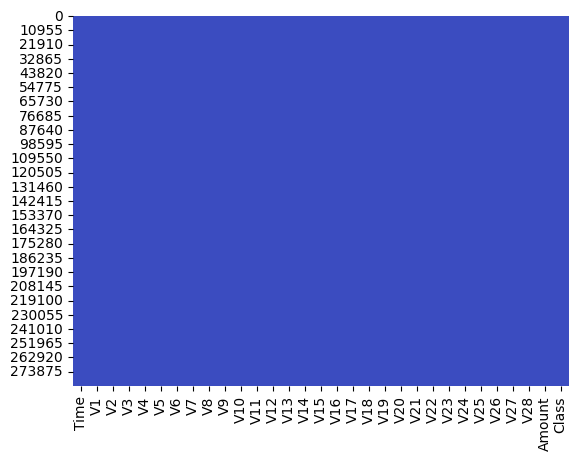

In [54]:
sns.heatmap(creditcard.isnull(), cmap = "coolwarm", cbar = False)

We see that the data is consistent, in the sense that it has no missing values! Thus we don't need to deal with the part where we clean/preprocess the dataset by dealing with the missing values

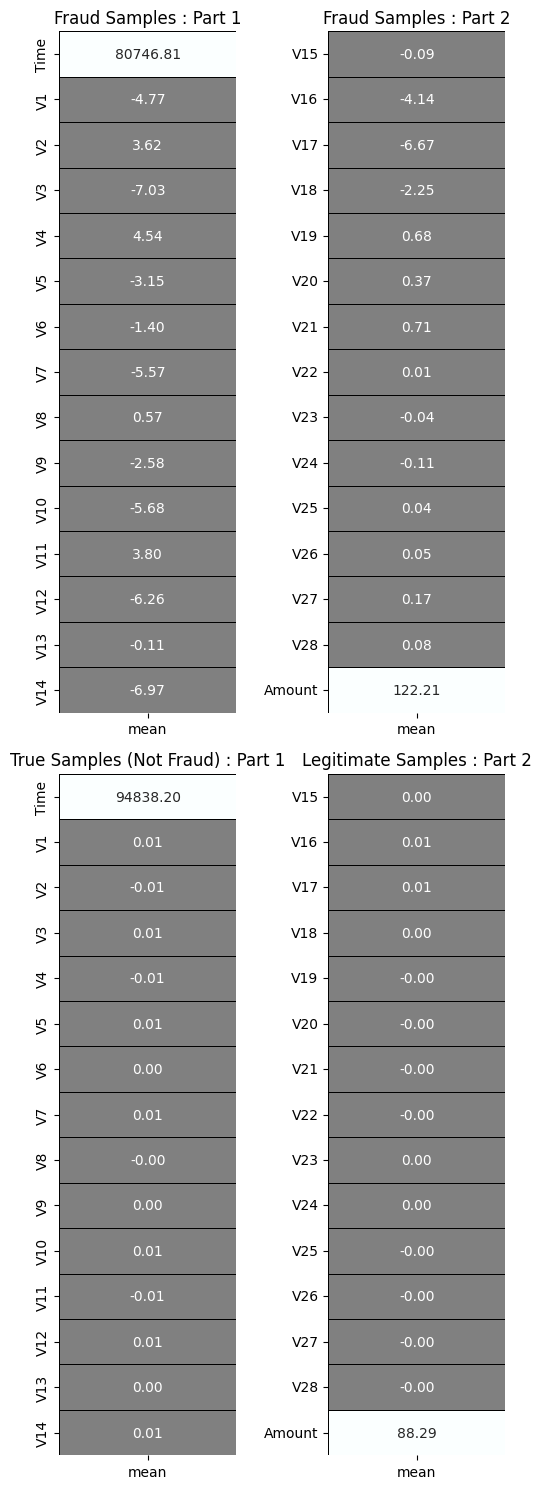

In [55]:
f = creditcard[creditcard['Class'] == 1].describe().T
t = creditcard[creditcard['Class'] == 0].describe().T

colors = ['#808080','#FBFFFF']

fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (5,15))
plt.subplot(2,2,1)
sns.heatmap(f[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 1');

plt.subplot(2,2,2)
sns.heatmap(f[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 2');

plt.subplot(2,2,3)
sns.heatmap(t[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('True Samples (Not Fraud) : Part 1');

plt.subplot(2,2,4)
sns.heatmap(t[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Legitimate Samples : Part 2');

fig.tight_layout(w_pad = 2)

We observe the **Mean** values of Features for Fraud & Legitimate Cases.

For **Legitimate** cases, V1 - V28 Mean Values are nearly zero.

The average __Time Taken__ for Legitimate Transactions is more than those of Fraud transactions.

And these could play an important role in detecting Fraud Transactions!


***

# Data Visualization!

### Class Visualization

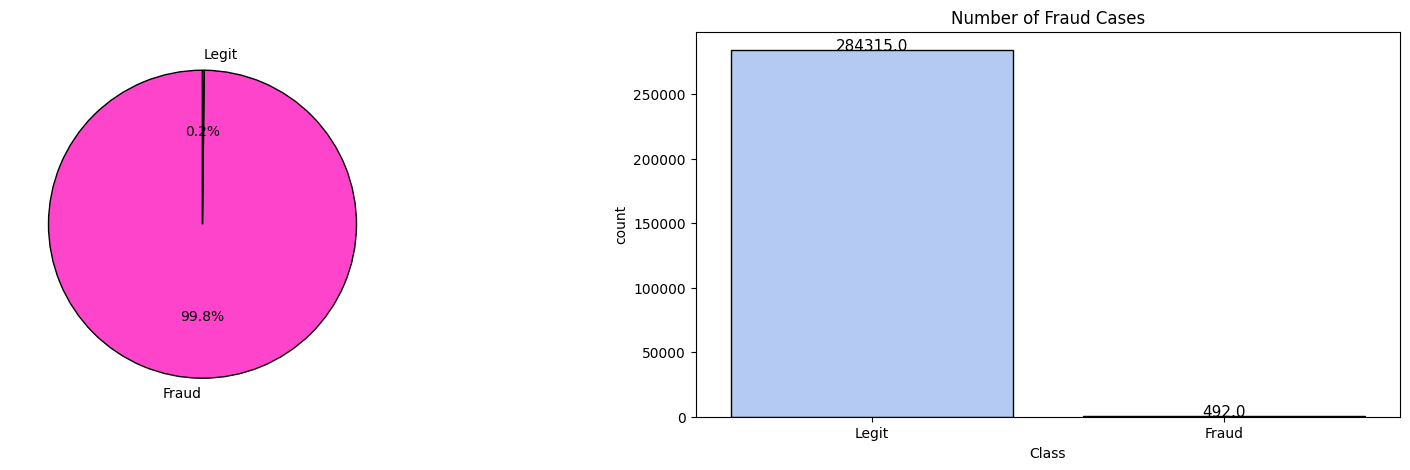

In [56]:
f = len(creditcard[creditcard['Class'] == 1]) / len(creditcard) * 100 # Finding the Numbe of Fraud Cases / Total Cases to visually represent them
t = len(creditcard[creditcard['Class'] == 0]) / len(creditcard) * 100

fraud_percentage = [t,f]

figure,axis = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
theme = ["#FF44CC", "#39FF14"]
plt.pie(fraud_percentage,labels = ['Fraud','Legit'],autopct='%1.1f%%',startangle = 90,colors = theme,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

plt.subplot(1,2,2)


axis = sns.countplot(data = creditcard, x = 'Class', edgecolor = 'black',palette = "coolwarm")
for rect in axis.patches:
    axis.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
axis.set_xticklabels(['Legit','Fraud'])
plt.title('Number of Fraud Cases');

### Remarks
1. The data is highly imbalanced with majority of the transactions naturally being legitimate.
2. Due to this imbalance in the dataset, the classification model will bias heavily towars the Legitimate (Majority) Class.

Thus, in order to train a good model, that has good generalization and is robust becomes very crucial to the data preprocessing.

## Removing Outliers
### Detecting Outliers and Removing Them

# Feature Selection

#### Correlation Heatmap with the target variable

<AxesSubplot: >

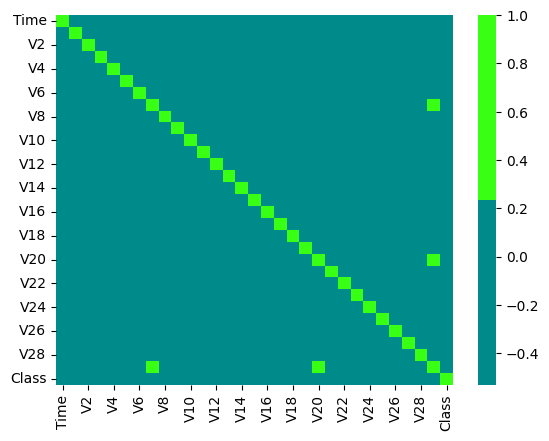

In [57]:
theme = ["#008B8B", "#39FF14"]
sns.heatmap(creditcard.corr(), cmap = theme, cbar = True)

Since we have a lot of features in the dataset, that too unlabeled, it is very difficult to undertand the relationships through this correlation map.

So we will try to plot the correlation map only with the target variable.

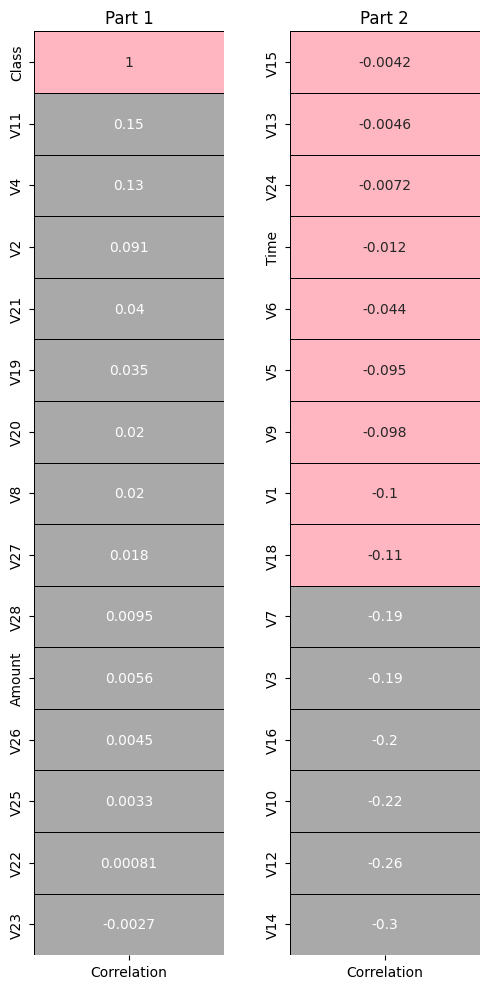

In [58]:
theme = ["#A9A9A9", "#FFB6C1"]

corr = creditcard.corrwith(creditcard['Class']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(corr.iloc[:15,:],annot = True,cmap = theme,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 1')

plt.subplot(1,2,2)
sns.heatmap(corr.iloc[15:30],annot = True,cmap = theme,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 2')

fig.tight_layout(w_pad = 3)

### Performing Feature Selection

1. For Feature Selection, We will try to remove the Features that have a very low correlations, in the range of [-0.1, 0.1] 

<br>

2. V4 & V11 are __Positively Correlated__ and __V7, V3, V16, V10, V12, V14, V17__ are negatively correlated with the Class Feature (Our Target Variable)



In [75]:
correlation_data = creditcard[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)

correlation_data.head()


,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


### Performing ANOVA Test to determine __Feature Importance__


In [59]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

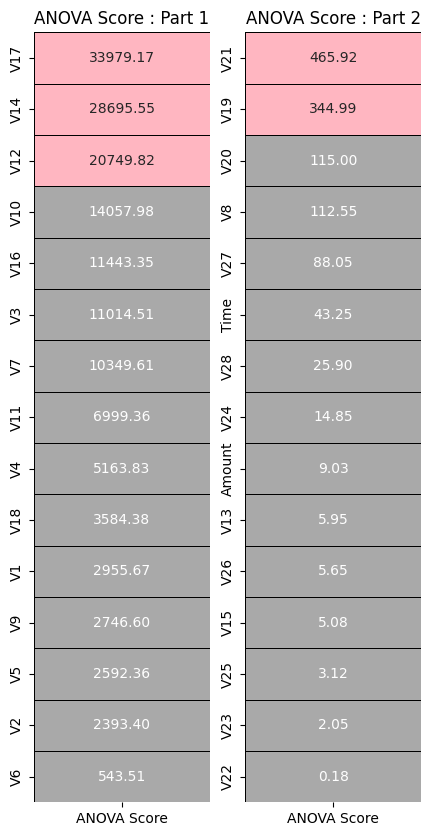

In [60]:
feature_set = creditcard.loc[:, :'Amount'] # Selecting all features from Time to Amount

target_set = creditcard.loc[:, 'Class'] 

best_features = SelectKBest(score_func = f_classif, k = 'all')

fit = best_features.fit(feature_set, target_set)

feature_set_score = pd.DataFrame(data = fit.scores_, index = list(feature_set.columns), columns = ['ANOVA Score'])

feature_set_score = feature_set_score.sort_values(ascending = False, by = 'ANOVA Score')

figure, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (5, 10))


plt.subplot(1,2,1)
sns.heatmap(feature_set_score.iloc[:15,:],annot = True,cmap = theme,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 1')

plt.subplot(1,2,2)
sns.heatmap(feature_set_score.iloc[15:30],annot = True,cmap = theme,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 2')

fig.tight_layout(w_pad = 3)

- We have values of the ANOVA Scores
- High ANOVA Score indicates Higher Importance of the feature with reference to the Target Variable
- From the Graphical Representation we see above, we will reject features with values of the ANOVA Score lesser than 50
- In this case, we will create 2 models based on Features Selected from the Correlation Plot & ANOVA Scores

__Dataset__ for Model Based on ANOVA Score:

In [66]:
anova_based_data = creditcard.copy(deep = True)

anova_based_data.drop(columns = list(feature_set_score.index[20:]), inplace = True)

anova_based_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V19,V20,V21,V27,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.133558,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.008983,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.055353,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.062723,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.219422,0


***
# Balancing The Data


- What we can do?
    -    __Undersampling__: To reduce the bias introduced by so many legitimate cases, we can trim them down
    -    **Oversampling**: Or we can increase the Minority Samples (Fraud) of the target variable to the majority samples.

__imblearn__ is used for data balancing
    


In [61]:
import imblearn

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

1. Data Balancing for Model Based on Correlation Plot:
    -    We oversample and undersample the data using different sampling strategies
    

### First we perform some calculation!

__Sampling Strategy__ is the ratio which is the common parameter for Over and Under Sampling = (Samples of Minority Class) / (Samples of Majority Class)

In our case: 
- Majority Case: Legitimate Transactions: 284315 samples
- Minority Class: Fraud Cases: 492 samples

#### Undersampling

We try to trim the Majority Class Samples

Sampling_Strategy = 0.1

0.1 = (492)/Majority Class Samples

> That Means: After Performing Undersampling,<br>
    Majority Class: Legitimate Transaction: __4920 Cases__ <br>
    Minority Class: Fraud Transactions    : __492 Cases__

#### OverSampling
Here we'll try to Increase the Minority Class Cases
- Sampling_Strategy = 0.5
So 0.5 would be = (Minority Class Samples)/4920

After Performing Oversampling,

> We will have Majority Class: 4920 Cases
> Minority Class: 2460 Cases

For such imbalanced datasets, we duplicate the data to deal with the potential bias in the model's outcomes / predictions.

Due to this duplication, we use the Synthetic Data we thus, generate! for modeling and training to ensure that the predictions are not biased or inclined towards the majority target class value.


In [76]:
oversampled = SMOTE(sampling_strategy = 0.5)

undersampled = RandomUnderSampler(sampling_strategy = 0.1)

feature_set_2 = correlation_data.iloc[:, :9].values

target_set_2 = correlation_data.iloc[:, 9].values

steps = [('under', undersampled), ('over', oversampled)]

pipeline = Pipeline(steps = steps)

feature_set_2, target_set_2 = pipeline.fit_resample(feature_set_2, target_set_2)
Counter(target_set_2)

# Check the counter here!

Counter({0: 4920, 1: 2460})

2. Data Balancing for Model Based on ANOVA Score:
    -    We oversample and undersample the data using different sampling strategies

In [71]:
oversampled = SMOTE(sampling_strategy = 0.5)

undersampled = RandomUnderSampler(sampling_strategy = 0.1)

feature_set_3 = anova_based_data.iloc[:, :20].values

target_set_3 = anova_based_data.iloc[:, 20].values

steps = [('under', undersampled), ('over', oversampled)]

pipeline = Pipeline(steps = steps)

feature_set_3, target_set_3 = pipeline.fit_resample(feature_set_3, target_set_3)
Counter(target_set_3)

Counter({0: 4920, 1: 2460})

To Evaluate Models using __Accuracy__ will be highly unreliable. We should rather go for Performance Metrics like Confusion Matrix, ROC-AUC Graph and ROC-AUC Score for model evaluation.

***
***

#             M o D e L L i n G

In [78]:
from sklearn.metrics import confusion_matrix
# Performance Metric

# Receiver Operating Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay


# Cross-Val and Hypertuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# K-Fold and Precision Recall Metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

We split the data into 75:25 Train-Test Split

In [79]:
# Train Test Split for correlation_data

x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(feature_set_2, target_set_2, test_size = 0.25, random_state = 2)

x_train_anova, x_test_anova, y_train_anova, y_test_anova = train_test_split(feature_set_3, target_set_3, test_size = 0.25, random_state = 2)



In [ ]:
# We make a function that we can use to fit a model on the dataset and test it and plot the relevant plots

def fit_test(model, x_train, y_train, x_test, y_test):
    # Fit the model
    model.fit(x_train, y_train)
    
    # predict on the test dataset
    
    y_pred = model.predict(x_test)
    
    crossval = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
    
    print()